# **Predicting if a person would buy life insurance based on his age using logistic regression**


Below is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

### Importing necessary modules

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Gathering dataset

In [117]:
url='https://raw.githubusercontent.com/codebasics/py/master/ML/7_logistic_reg/insurance_data.csv'
df=pd.read_csv(url)

### Data Exploration

In [118]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [119]:
df.dtypes

age                 int64
bought_insurance    int64
dtype: object

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [121]:
df.memory_usage()

Index               128
age                 216
bought_insurance    216
dtype: int64

In [122]:
df.memory_usage().sum()

560

In [123]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


### Mean

In [124]:
df.mean()

age                 39.666667
bought_insurance     0.518519
dtype: float64

In [125]:
df['bought_insurance'].mean()

0.5185185185185185

In [126]:
df['age'].mean()

39.666666666666664

### Variance

In [127]:
df.var()

age                 247.923077
bought_insurance      0.259259
dtype: float64

### Skewness

In [128]:
df.skew()

age                -0.053119
bought_insurance   -0.078558
dtype: float64

### Kurtosis

In [129]:
df.kurtosis()

age                -1.712474
bought_insurance   -2.160000
dtype: float64

### Min, Max and Median Values

In [130]:
df.min()

age                 18
bought_insurance     0
dtype: int64

In [131]:
df.max()

age                 62
bought_insurance     1
dtype: int64

In [132]:
df.median()

age                 45.0
bought_insurance     1.0
dtype: float64

### Correlation Heatmap and Pairplot

In [133]:
df.corr()

,age,bought_insurance
age,1.000000,0.732395
bought_insurance,0.732395,1.000000


In [134]:
import seaborn as sns

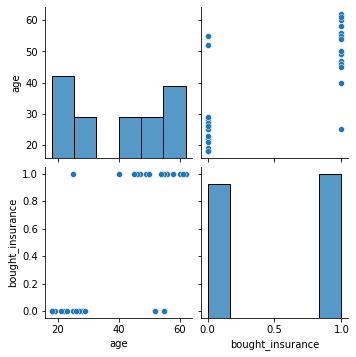

In [135]:
sns.pairplot(df)

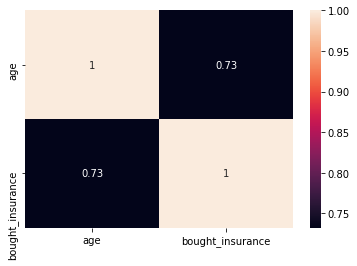

In [136]:
sns.heatmap(df.corr(),annot=True)

## Data Visualization

### Lineplot

Text(0, 0.5, 'insurance')

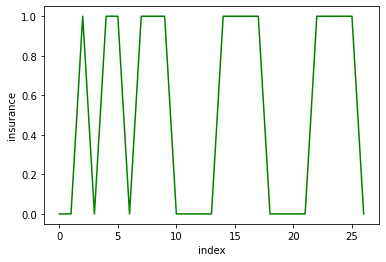

In [137]:
df['bought_insurance'].plot(color='green')
plt.xlabel('index')
plt.ylabel('insurance')

Text(0, 0.5, 'Age')

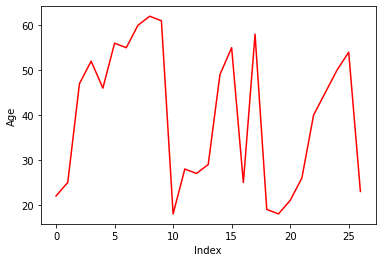

In [138]:
df['age'].plot(color='red')
plt.xlabel('Index')
plt.ylabel('Age')

### Boxplot

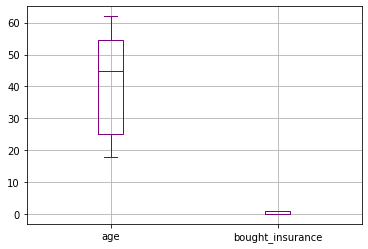

In [139]:
df.boxplot(color='purple')

### Histogram

Text(0, 0.5, 'Frequency')

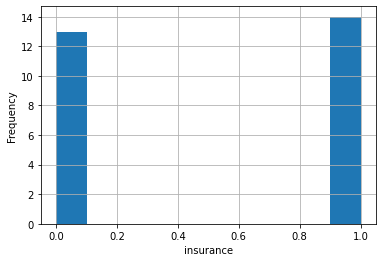

In [140]:
plot = df['bought_insurance'].hist()
plot.set_xlabel('insurance')
plot.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

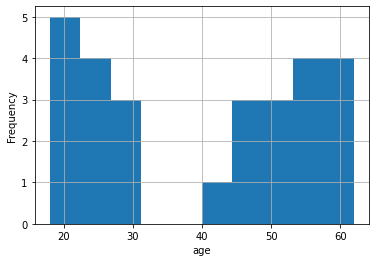

In [141]:
plot = df['age'].hist()
plot.set_xlabel('age')
plot.set_ylabel('Frequency')

### Barplot

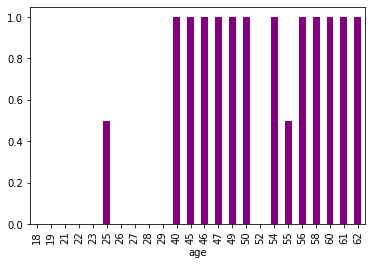

In [142]:
df_avg = df.groupby('age')['bought_insurance'].mean()
df_avg[:].plot.bar(color='purple');

### Multiple Plots

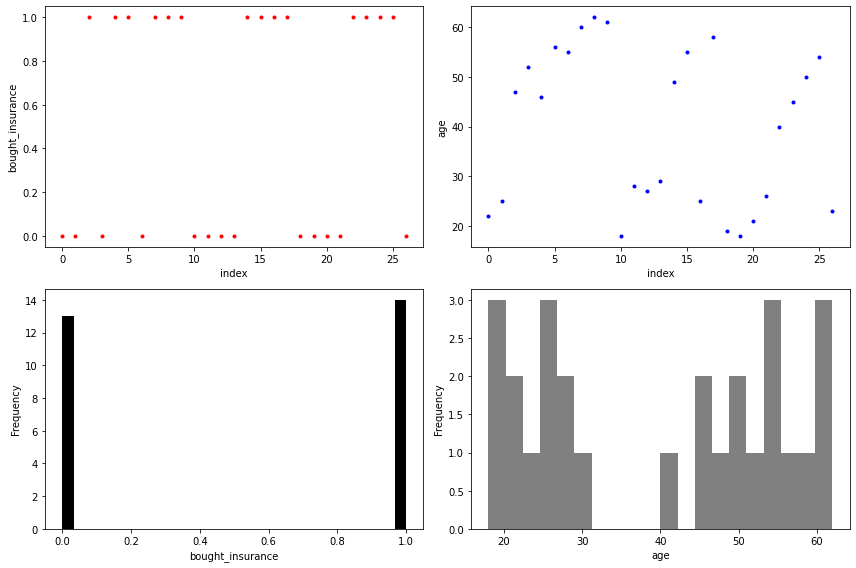

In [143]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df['bought_insurance'].plot(ax = axes[0][0], style='.', color='red')
df['age'].plot(ax = axes[0][1], style='.', color='blue') 
df['bought_insurance'].plot.hist(bins=30, ax = axes[1][0], color='black')
df['age'].plot.hist(bins=20, ax = axes[1][1], color='gray') 



axes[0][0].set_xlabel('index')
axes[0][0].set_ylabel('bought_insurance')

axes[0][1].set_xlabel('index')
axes[0][1].set_ylabel('age')

axes[1][0].set_xlabel('bought_insurance')
axes[1][1].set_xlabel('age')


fig.tight_layout()

### Scatterplot

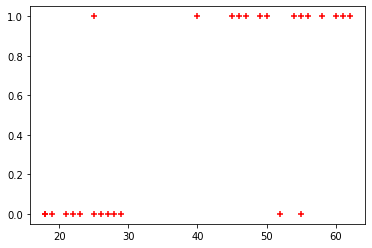

In [144]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

### Splitting dataset into train and test data

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

### Creating the Logistic Regression Model

In [149]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [150]:
X_test

,age
0,22
15,55
24,50
17,58
8,62
22,40


In [151]:
X_train

,age
25,54
5,56
1,25
19,18
7,60
9,61
6,55
18,19
2,47
14,49


In [152]:
y_train

25    1
5     1
1     0
19    0
7     1
9     1
6     0
18    0
2     1
14    1
26    0
16    1
23    1
3     0
4     1
12    0
20    0
11    0
13    0
10    0
21    0
Name: bought_insurance, dtype: int64

In [153]:
y_test

0     0
15    1
24    1
17    1
8     1
22    1
Name: bought_insurance, dtype: int64

In [154]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
y_predicted = model.predict(X_test)
y_predicted

array([0, 1, 1, 1, 1, 0])

In [156]:
model.predict_proba(X_test)

array([[0.90792068, 0.09207932],
       [0.16435989, 0.83564011],
       [0.26250072, 0.73749928],
       [0.12110405, 0.87889595],
       [0.07896313, 0.92103687],
       [0.53823648, 0.46176352]])

In [157]:
y_predicted

array([0, 1, 1, 1, 1, 0])

### Evaluation Metrics

### 1. Mean Absolute Error

In [158]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_predicted)

0.16666666666666666

### 2. Mean Squared Error

In [159]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predicted)

0.16666666666666666

### 3. Root Mean Squared Error

In [160]:
np.sqrt(mean_squared_error(y_test,y_predicted))

0.408248290463863

### 4. Root Mean Squared Log Error

In [161]:
np.log(np.sqrt(mean_squared_error(y_test,y_predicted)))

-0.8958797346140275

### 5. Accuracy Score

In [162]:
model.score(X_test,y_test)

0.8333333333333334

### Conclusion

Logistic Regression model makes predictions with 83% accuracy.

## sigmoid function

In [163]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [164]:
model.coef_

array([[0.11862564]])

In [165]:
model.intercept_

array([-4.89827083])

In [166]:
def prediction_function(age):
    z = 0.12 * age - 4.9         
    y = sigmoid(z)
    return y

In [167]:
age = 20
prediction_function(age)

0.08471056573073579

In [168]:
age = 43
prediction_function(age)

0.7858349830425586

### K-Fold Cross Validation

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [180]:
kfold_cv = KFold(n_splits=5, random_state=40, shuffle=True)

In [181]:
model = LogisticRegression()

In [182]:
kfold_scores = cross_val_score(model ,X_train, y_train, cv = kfold_cv)

In [183]:
kfold_scores

array([1.  , 0.75, 0.75, 1.  , 0.75])

In [184]:
cross_validation_accuracy = np.mean(kfold_scores)

In [185]:
cross_validation_accuracy

0.85

### Conclusion

After K-Fold Cross Validation, the mean accuracy of our Logistic Regression model is 85%